In [1]:
import numpy as np
import matplotlib.pyplot as plt
import finesse
from finesse.analysis.actions import RunLocks, Noxaxis
from finesse import ligo
from LLOF3NoSqz import make_LLO

finesse.configure(plotting=True)

In [2]:
LLObase = finesse.Model()
LLObase.parse_file("./LIGO_degisn.txt")

LLObase.print_mismatches()

╒════════════════════════════╤════════════════╤════════════════╕
│ Coupling                   │   Mismatch (x) │   Mismatch (y) │
╞════════════════════════════╪════════════════╪════════════════╡
│ BS.p1.i -> BS.p2.o         │    6.49062e-10 │    6.5921e-09  │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p2.i -> BS.p4.o         │    0.000112816 │    0.00231216  │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p2.i -> BS.p1.o         │    6.49062e-10 │    6.5921e-09  │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p3.i -> BS.p4.o         │    0.000113158 │    0.00231736  │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p4.i -> BS.p2.o         │    0.000112816 │    0.00231216  │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p4.i -> BS.p3.o         │    0.000113158 │    0.00231736  │
├────────────────────────────┼────────────────┼────────────────┤
│ ITMX.p1.i -> ITMX.p2.o 

In [5]:
LIGO = finesse.Model()
LIGO.parse_file("./LIGO_degisn.txt")
# LLO.Mloss.value = 3.75e-05

# LLO.unparse_file("./LLONoOutputOptics.txt", inplace=True)
# LLO = make_LLO(LIGO)
# LLO.modes("off")

In [8]:
LIGO_wen = finesse.Model()
LIGO_wen.parse_file("./LIGO_degisn.txt")

# LLO_wen = make_LLO(LIGO_wen.deepcopy()) 
# LLO_wen.DARM.DC = 0.0034157365226926634
# LLO_wen.DARM.DC = 0
# LLO_wen.mod1.midx = 1e-9
# LLO_wen.mod2.midx = 1e-9


# offset = 1.45e-5
# LLO_wen.ETMY.T = 3.9e-06
# LLO_wen.ETMY.L = 4e-05 + offset
# LLO_wen.ETMY.R = 0.9999561 - offset

# offset = 1.45e-5
# LLO_wen.ETMX.T = 3.9e-06
# LLO_wen.ETMX.L = 4e-05 + offset
# LLO_wen.ETMX.R = 0.9999561 - offset

# offset = 4.7e-4
# LLO_wen.SRM.T = 0.324
# LLO_wen.SRM.L = 7.4e-06 + offset
# LLO_wen.SRM.R = 0.6759926 - offset


# offset = 4.7e-4
# LLO_wen.SRM.T = 0.324
# LLO_wen.SRM.L = 7.4e-06 + offset
# LLO_wen.SRM.R = 0.6759926 - offset


# LLO_wen.parse("""
# ad ASC SRMAR.p2.o f=0
# """)

# # out_wen = LLO_wen.run(Noxaxis(pre_step=RunLocks(method='newton', 
# #                                             display_progress=False,
# #                                             max_iterations=1000)))

# out_wen = LLO_wen.run(Noxaxis())

# print(out_wen["Px"], out_wen["Py"], )
# print(f"The power in the carrier at AS is {np.abs(out_wen['ASC'])**2} W")

In [10]:
LIGO_wen.cavXARM.info_parameter_table()

Description,Value
FSR,37530.35277916875
Loss,0.014064508949999999
Finesse,443.59053164385415
FWHM,84.60584728914091
Storage time,0.003762268169195978
Pole,42.302923644570456
Round trip length,7988.0
Waist size,[0.0120448 0.0120448]
Waist position,[-2160.05250722 -2160.05250722]
Stability (m-factor),[0.65964121 0.65964121]


In [3]:
LLOtest = LLO.deepcopy()

LLOtest.parse("""
bp DBS1 OFI.p1.o gouy
bp DBS2 OFI.p2.i gouy
bp DBS3 OFI.p3.i gouy
bp DBS4 OFI.p4.o gouy

pd PXarm ETMX.p1.o
pd PYarm ETMY.p1.o
pd POMC OMC_OC.p3.o
""")

outDebug = LLOtest.run(Noxaxis(pre_step=RunLocks(method='newton', 
                                                   display_progress='false', max_iterations=1000)))
outDebug['DBS2']-outDebug['DBS1'], outDebug['DBS3']-outDebug['DBS1'], outDebug['DBS4']-outDebug['DBS1'], \
# outDebug['PXarm'], outDebug['PYarm'], outDebug['POMC'], 

Error Signal Residuals at Each Iteration (W):
                          CARM_lock      MICH_lock      PRCL_lock      SRCL_lock    DARM_dc_lock  
                          REFL9_I1       POP45_Q1        POP9_I1       POP45_I1        AS_DC1     
Iteration Number    0      1.02e-05       7.46e-08       1.58e-07       6.10e-08      -3.90e-03   
Iteration Number    1      3.77e-10       5.66e-12       3.56e-12       2.64e-12       2.36e-04   
Iteration Number    2     -2.33e-11      -3.52e-13      -2.19e-13      -1.76e-13      -2.77e-05   
Iteration Number    3      2.73e-12       4.12e-14       2.55e-14       2.05e-14       3.16e-06   
Iteration Number    4     -3.18e-13      -4.83e-15      -3.30e-15      -2.20e-15      -3.62e-07   


(0.0, 0.0, 0.0)

In [6]:
print(LLOtest.cavXARM.info_parameter_table())
print(LLOtest.cavYARM.qx.Rc)

╒═══════════════════════╤═════════════════════════════════╕
│ Description           │ Value                           │
╞═══════════════════════╪═════════════════════════════════╡
│ FSR                   │ 37525.79594115386               │
├───────────────────────┼─────────────────────────────────┤
│ Loss                  │ 0.01486934765600001             │
├───────────────────────┼─────────────────────────────────┤
│ Finesse               │ 419.4081827829517               │
├───────────────────────┼─────────────────────────────────┤
│ FWHM                  │ 89.47320887292719               │
├───────────────────────┼─────────────────────────────────┤
│ Storage time          │ 0.003557599980971566            │
├───────────────────────┼─────────────────────────────────┤
│ Pole                  │ 44.736604436463594              │
├───────────────────────┼─────────────────────────────────┤
│ Round trip length     │ 7988.97                         │
├───────────────────────┼───────────────

In [7]:
LLOtest.print_mismatches()

╒════════════════════════════╤════════════════╤════════════════╕
│ Coupling                   │   Mismatch (x) │   Mismatch (y) │
╞════════════════════════════╪════════════════╪════════════════╡
│ BS.p1.i -> BS.p2.o         │    2.91307e-05 │    3.30789e-05 │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p2.i -> BS.p4.o         │    4.27427e-05 │    0.000637753 │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p2.i -> BS.p1.o         │    2.91307e-05 │    3.30789e-05 │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p3.i -> BS.p4.o         │    6.75304e-05 │    0.000448204 │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p4.i -> BS.p2.o         │    4.27427e-05 │    0.000637753 │
├────────────────────────────┼────────────────┼────────────────┤
│ BS.p4.i -> BS.p3.o         │    6.75304e-05 │    0.000448204 │
├────────────────────────────┼────────────────┼────────────────┤
│ ITMX.p1.i -> ITMX.p2.o 

In [11]:
LLOQNLS = LLO.deepcopy()

LLOQNLS.parse("""
###########################################################################
### pendulum for QRPN
variable Mitmy 39.420 
variable Metmy 39.642
variable Mitmx 39.603
variable Metmx 39.508

pendulum itmx_sus ITMX.mech mass=&Mitmx
pendulum etmx_sus ETMX.mech mass=&Metmx
pendulum itmy_sus ITMY.mech mass=&Mitmy
pendulum etmy_sus ETMY.mech mass=&Metmy

fsig(1)
sgen darmx LX.h
sgen darmy LY.h phase=180

qnoised qnoise OMC_OC.p3.o nsr=True
qshot qshot OMC_OC.p3.o nsr=false

xaxis(darmx.f, log, 5, 5k, 100, 
            pre_step=run_locks(method='newton', display_progress=false, max_iterations=1000))


ad AMP45 OMC_IC.p1.i f=&f2
ad AMP45M OMC_IC.p1.i f=(-1)*&f2

ad AMPCar OMC_IC.p1.i f=0

""")
# print(LLOQNLS.unparse())   
outLLO = LLOQNLS.run()
print("The amplitude of 45MHz sidebands is: " + 
      f"{np.abs(outLLO['AMP45'])[0]} ")
print("The amplitude ratio between the upper 45MHz sidebands against the carrier is: " + 
      f"{(np.abs(outLLO['AMP45']/outLLO['AMPCar']))[0]} ")
print("The amplitude ratio between the lower 45MHz sidebands against the carrier is: " + 
      f"{(np.abs(outLLO['AMP45M']/outLLO['AMPCar']))[0]} ")

The amplitude of 45MHz sidebands is: 0.402801776262626 
The amplitude ratio between the upper 45MHz sidebands against the carrier is: 2.7952829714948626 
The amplitude ratio between the lower 45MHz sidebands against the carrier is: 2.7952829713947875 


In [12]:
(2.7892615361312427)**2*2

15.55995983388244

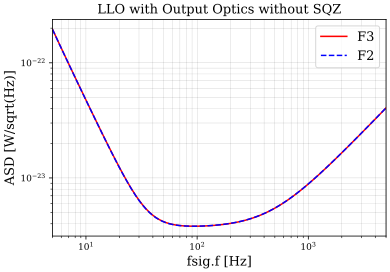

In [13]:
# LLOWithoutOutputOptics = np.load("./LLOWithoutOutputOptics.npy")
strain_sensitivityF2WithoutSQZ = np.load("../F2 code/strain_sensitivityF2WithoutSQZ.npy")
# QNLSDesignF3 = np.load("../QNLSDesignF3.npy")
# strain_sensitivityF3WithSQZ = np.load("../strain_sensitivityF3WithSQZ.npy") 


x = np.logspace(np.log10(5), np.log10(5000), num=101)

fig,ax =plt.subplots(1,1,figsize=(6,4))

ax.loglog(x, outLLO["qnoise"].real, 'r', label='F3')
ax.loglog(x, strain_sensitivityF2WithoutSQZ, 'b--', label="F2")

ax.set_title("LLO with Output Optics without SQZ", fontsize=13)
ax.set_ylabel("ASD [W/sqrt(Hz)]", fontsize=13)
ax.legend(loc = 'upper right', fontsize=13)

# ax.set_ylabel("The difference", fontsize=13)
ax.set_xlabel("fsig.f [Hz]", fontsize=13);

<Figure size 576x355.968 with 0 Axes>

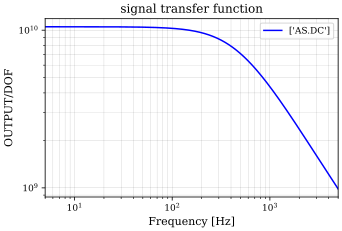

In [14]:
LLOSignal = LLO.deepcopy()

LLOSignal.parse("""
fsig(1)

frequency_response(
geomspace(5, 5k, 10000),  # frequency vector
[DARM,],  # injection nodes, dof DARM
AS.DC,  # OMC_OC.p3.o DC, AS port
name='signal transfer function'
)

""")

sol = LLOSignal.run()
sol.plot('signal transfer function');

In [17]:
sol["signal transfer function"]

array([1.05121948e+10-1.15259829e+08j, 1.05121931e+10-1.15340044e+08j,
       1.05121914e+10-1.15420314e+08j, ...,
       9.65302253e+06-9.86084604e+08j, 9.52935059e+06-9.85447514e+08j,
       9.40583869e+06-9.84810867e+08j])

3dB PSD Decrement Corresponds to a ASD Decrement Factor of: 1.4125375446227544
The 3dB Signal PSD Decrement Frequency (the Pole Frequency) Is at: 457.0525159372063 Hz


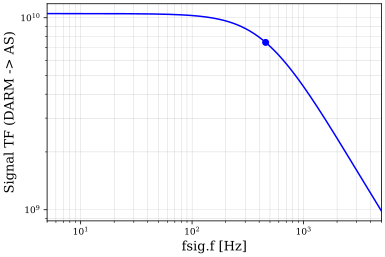

In [22]:
solution = np.abs(sol['signal transfer function'])
scaled = solution.max()/solution
x = np.logspace(np.log10(5), np.log10(5000), num=10000)

fig,ax =plt.subplots(1,1,figsize=(6,4))
y = np.abs(sol["signal transfer function"])
ax.loglog(x, y)

# ax.set_title("Signal Transfer Function (DARM -> AS)", fontsize=13)
ax.set_ylabel("Signal TF (DARM -> AS)", fontsize=13)
ax.set_xlabel("fsig.f [Hz]", fontsize=13);

ratio = 10**(3/20)
print(f"3dB PSD Decrement Corresponds to a ASD Decrement Factor of: {ratio}")
argmax = (1/(np.abs(scaled-ratio))).argmax()
# ax.axvline(x=x[argmax], ymin=0.1, ymax=scaled[argmax])
# ax.axhline(y=scaled[argmax], xmin=x[0], xmax=x[argmax])

ax.scatter(x[argmax], y[argmax]);
print(f"The 3dB Signal PSD Decrement Frequency (the Pole Frequency) Is at: {x[argmax]} Hz")
# fig.savefig('./polefreq.pdf')

3dB PSD Decrement Corresponds to a ASD Decrement Factor of: 1.4125375446227544
The 3dB Signal PSD Decrement Frequency (the Pole Frequency) Is at: 456.42144747145073 Hz


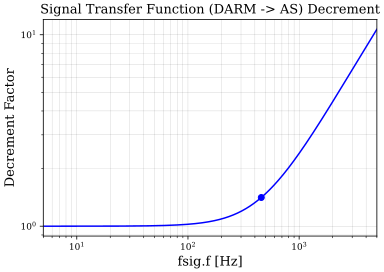

In [15]:
solution = np.abs(sol['signal transfer function'])
scaled = solution.max()/solution
x = np.logspace(np.log10(5), np.log10(5000), num=10000)

fig,ax =plt.subplots(1,1,figsize=(6,4))

ax.loglog(x, scaled)

ax.set_title("Signal Transfer Function (DARM -> AS) Decrement", fontsize=13)
ax.set_ylabel("Decrement Factor", fontsize=13)
ax.set_xlabel("fsig.f [Hz]", fontsize=13);

ratio = 10**(3/20)
print(f"3dB PSD Decrement Corresponds to a ASD Decrement Factor of: {ratio}")
argmax = (1/(np.abs(scaled-ratio))).argmax()
# ax.axvline(x=x[argmax], ymin=0.1, ymax=scaled[argmax])
# ax.axhline(y=scaled[argmax], xmin=x[0], xmax=x[argmax])

ax.scatter(x[argmax], scaled[argmax]);
print(f"The 3dB Signal PSD Decrement Frequency (the Pole Frequency) Is at: {x[argmax]} Hz")

cavity pole frequency measurement in the logbook post: [Dec 2021](https://alog.ligo-la.caltech.edu/aLOG/index.php?callRep=58269)

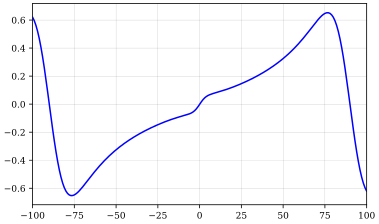

In [14]:
LLOErrorSignalSRCL = LLO.deepcopy()
# LLOErrorSignalSRCL.POP45.phase = 177
# for el in LLOErrorSignalSRCL.elements:
#     if el.startswith('POP45'):
#         LLOErrorSignalSRCL.remove(el)

LLOErrorSignalSRCL.parse("""
    xaxis(SRCL.DC, lin, -100, 100, 200, name='xaxis1')
    readout_rf POP45New PRMAR.p1.o   f=&f2 phase=178 output_detectors=true
    readout_rf POP45NewP PRMAR.p1.o   f=&f2 phase=168 output_detectors=true
    readout_rf POP45NewM PRMAR.p1.o   f=&f2 phase=188 output_detectors=true
    
    #lock SRCL_lock POP45_I SRCL.DC -43.220106415336616 1e-6
""")

outLLOErrorSignalSRCL = LLOErrorSignalSRCL.run()
plt.plot(outLLOErrorSignalSRCL.x[0], outLLOErrorSignalSRCL["POP45New_I"]);

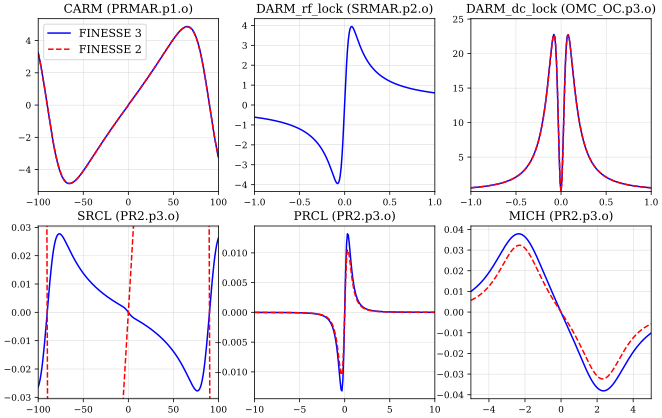

In [31]:
LLOErrorSignal = LLO.deepcopy()
# LLOQNLS.SRCL.DC = 90
LLOErrorSignal.parse("""
series(
    xaxis(CARM.DC, lin, -100, 100, 200, name='xaxis1'),
    xaxis(DARM.DC, lin, -1, 1, 200, name='xaxis2', relative=True),
    xaxis(SRCL.DC, lin, -100, 100, 200, name='xaxis3'),
    xaxis(PRCL.DC, lin, -10, 10, 200, name='xaxis4'),
    xaxis(MICH2.DC, lin, -5, 5, 200, name='xaxis5'),
)
""")

outLLOErrorSignal = LLOErrorSignal.run()

errorSignalsF2 = np.load("../F2 code/errorSignals.npy")
DOFs = ["CARM (PRMAR.p1.o)", "DARM_rf_lock (SRMAR.p2.o)", "DARM_dc_lock (OMC_OC.p3.o)", 
        "SRCL (PR2.p3.o)", "PRCL (PR2.p3.o)", "MICH (PR2.p3.o)",]
Signals = ["REFL9_I", "AS45_I", "AS_DC", "POP45_I", "POP9_I", "POP45_Q",]
x1 = np.linspace(-100, 100, num=201)
x2 = np.linspace(-1, 1, num=201)
x3 = np.linspace(-100, 100, num=201)
x4 = np.linspace(-10, 10, num=201)
x5 = np.linspace(-5, 5, num=201)

fig, axes = plt.subplots(2, 3, figsize=(11, 7))

index = 0
for i in range(2):
    for j in range(3):
#         if index > 4:
#             axes[i, j].spines['top'].set_visible(False)
#             axes[i, j].spines['right'].set_visible(False)
#             axes[i, j].spines['bottom'].set_visible(False)
#             axes[i, j].spines['left'].set_visible(False)
#             axes[i, j].get_xaxis().set_ticks([])
#             axes[i, j].get_yaxis().set_ticks([])
#             break
        
        axes[i, j].set_title(DOFs[index])

        if index == 0:
            x = outLLOErrorSignal[f'xaxis1'].x[0]
            y = outLLOErrorSignal[f'xaxis1'][Signals[index]]
            axes[i, j].plot(x, y, label="FINESSE 3")
            axes[i, j].plot(eval(f"x1"), errorSignalsF2[0], '--', label="FINESSE 2")
            axes[i, j].legend(loc="best", fontsize=11);
        elif index == 1 or index == 2:
            x = outLLOErrorSignal[f'xaxis2'].x[0]
            y = outLLOErrorSignal[f'xaxis2'][Signals[index]]
            axes[i, j].plot(x, y)
            if index == 2:
                axes[i, j].plot(eval(f"x2"), errorSignalsF2[1], '--')
            
        else:
            x = outLLOErrorSignal[f'xaxis{index}'].x[0]
            y = outLLOErrorSignal[f'xaxis{index}'][Signals[index]]
            axes[i, j].plot(x, y)
            axes[i, j].plot(eval(f"x{index}"), errorSignalsF2[index-1], '--')
        
        mmin = y.min()*(1+0.1)
        mmax = y.max()*(1+0.1)
    
        axes[i, j].set_ylim(mmin, mmax)
        index += 1

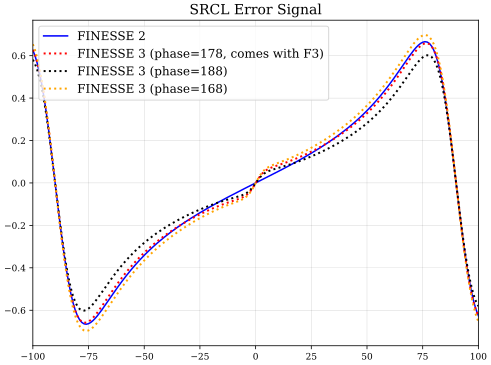

In [50]:
plt.figure(figsize=(8,6))
plt.plot(x3, errorSignalsF2[2], label="FINESSE 2 ")
# plt.plot(x3, outLLOErrorSignalSRCL["POP45New_I"], label="FINESSE 3 (PRMAR.p1.o)", ls=":")
plt.plot(x3, outLLOErrorSignalSRCL["POP45New_I"], label="FINESSE 3 (phase=178, comes with F3)", ls=":", lw=2)
plt.plot(x3, outLLOErrorSignalSRCL["POP45NewP_I"], label="FINESSE 3 (phase=188)", ls=":", lw=2)
plt.plot(x3, outLLOErrorSignalSRCL["POP45NewM_I"], label="FINESSE 3 (phase=168)", ls=":", lw=2)

plt.legend(fontsize=12, loc="best")

plt.title("SRCL Error Signal", fontsize=14);

## No output optics

In [5]:
from LLOF3NoOutputSqz import make_LLO

LLONoOutput = finesse.Model()
LLONoOutput.parse_file("./LIGO_degisn_no_Output.txt")

LLONoOutput = make_LLO(LLONoOutput)


LLOQNLSNoOutput = LLO.deepcopy()

LLOQNLSNoOutput.parse("""
###########################################################################
### pendulum for QRPN
variable Mitmy 39.420 
variable Metmy 39.642
variable Mitmx 39.603
variable Metmx 39.508

pendulum itmx_sus ITMX.mech mass=&Mitmx
pendulum etmx_sus ETMX.mech mass=&Metmx
pendulum itmy_sus ITMY.mech mass=&Mitmy
pendulum etmy_sus ETMY.mech mass=&Metmy

fsig(1)
sgen darmx LX.h
sgen darmy LY.h phase=180

qnoised qnoise SRMAR.p2.o nsr=True
qshot qshot SRMAR.p2.o nsr=false

xaxis(darmx.f, log, 5, 5k, 100, 
            pre_step=run_locks(method='newton', display_progress=false, max_iterations=1000))

ad AMP45 SRMAR.p2.o f=&f2
ad AMPCar SRMAR.p2.o f=0
""")
outLLONoOutput = LLOQNLSNoOutput.run()
print("The amplitude of 45MHz sidebands is: " + 
      f"{np.abs(outLLONoOutput['AMP45'])[0]} ")
print("The power ratio between the 45MHz sidebands against the carrier is: " + 
      f"{(np.abs(outLLONoOutput['AMP45']/outLLONoOutput['AMPCar']))[0]} ")

The amplitude of 45MHz sidebands is: 0.4050133635632251 
The power ratio between the 45MHz sidebands against the carrier is: 2.795282971494862 


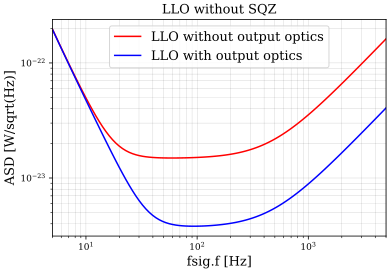

In [25]:
strain_sensitivityF2WithoutSQZ = np.load("../F2 code/strain_sensitivityF2WithoutSQZ.npy")


x = np.logspace(np.log10(5), np.log10(5000), num=101)

fig,ax =plt.subplots(1,1,figsize=(6,4))

ax.loglog(x, outLLONoOutput["qnoise"].real, 'r', label='LLO without output optics')
ax.loglog(x, strain_sensitivityF2WithoutSQZ, 'b', label="LLO with output optics")

ax.set_title("LLO without SQZ", fontsize=13)
ax.set_ylabel("ASD [W/sqrt(Hz)]", fontsize=13)
ax.legend(loc = 'best', fontsize=13)

# ax.set_ylabel("The difference", fontsize=13)
ax.set_xlabel("fsig.f [Hz]", fontsize=13);
# print(f"The ratio at high frequencies is: {strain_sensitivityF2WithoutSQZ/outLLONoOutput['qnoise'].real}")
# fig.savefig('./withOutputOptics.pdf')

The ratio at high frequencies is: 4.184101991759878


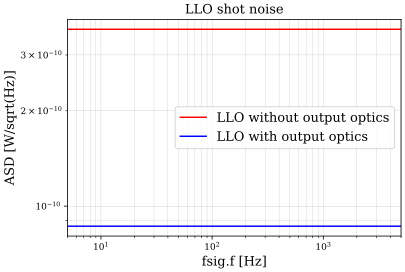

In [9]:
x = np.logspace(np.log10(5), np.log10(5000), num=101)

fig,ax =plt.subplots(1,1,figsize=(6,4))

ax.loglog(x, outLLONoOutput["qshot"].real, 'r', label='LLO without output optics')
ax.loglog(x, outLLO["qshot"].real, 'b', label="LLO with output optics")

ax.set_title("LLO shot noise", fontsize=13)
ax.set_ylabel("ASD [W/sqrt(Hz)]", fontsize=13)
ax.legend(loc = 'best', fontsize=13)

# ax.set_ylabel("The difference", fontsize=13)
ax.set_xlabel("fsig.f [Hz]", fontsize=13);
print(f"The ratio at high frequencies is: {(outLLONoOutput['qshot'].real/outLLO['qshot'].real).mean()}")